# Task1 : Business Analytics and Data Science Internship
 By Yashwanth Ramineni, Intern at The Sparks Foundation

In [ ]:
# Importing all the required libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
s_data = pd.read_csv(url)
print("Data imported successfully")
print("Reported time and scores:")

s_data.head(15)

Data imported successfully
Reported time and scores:


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Let's plot our data points on 2-D graph to look closely on our dataset and try to manually find any relationship between the data. 
Lets try to plot the graph with the below script:

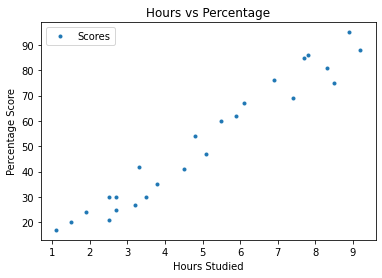

In [ ]:
# Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='.')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

The above graph shows relation between number of hours studied and the percentage of marks scored

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

Preparing the data The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [ ]:
x = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values

Now that we have our attributes and labels, the next step is to split this data into training and test sets. 
We'll do this by using Scikit-Learn's built-in train_test_split() method:




In [ ]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=50) 

In [ ]:
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(x_train, y_train) 

 LinearRegression (copy_X=True, fit interce n_jobs=None, normalize=False)

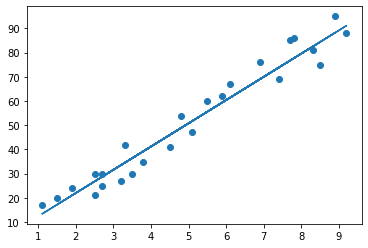

In [ ]:
m=reg.coef_
c=reg.intercept_
line = m*x+c
plt.scatter(x,y)
plt.plot(x, line)
plt.show()

In [ ]:
y_pred = reg.predict(x_test)

In [ ]:
actual_predicted = pd.DataFrame({'Target' :y_test, 'Predicted' :y_pred}) 
actual_predicted


,Target,Predicted
0,95,88.211394
1,30,28.718453
2,76,69.020122
3,35,39.273652
4,17,13.365436


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


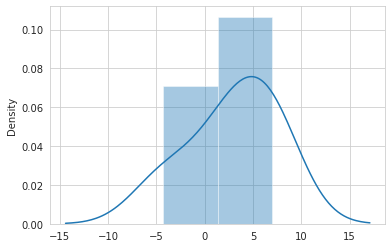

In [ ]:
sns.set_style( 'whitegrid')
sns.distplot(np.array(y_test-y_pred))
plt.show()

In [ ]:
h=7.5
s=reg.predict([[h]])
print("If a student studies for {} hours per day he/she will score {}% in exams.".format (h,s))

If a student studies for 7.5 hours per day he/she will score [74.77750369]% in exams.


Model evaluation:

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))
print("R2 Score:",r2_score(y_test,y_pred))

Mean Absolute Error: 4.5916495300630285
R2 Score: 0.971014141329942
